<a href="https://colab.research.google.com/github/pravallika89ch/alignn/blob/main/jarvis-tools-notebooks/ALIGNNFF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Train machine learning force-field with [ALIGNN](https://github.com/atomgptlab/alignn) for example Silicon dataset

# Table of contents

1. Install [ALIGNN](https://github.com/usnistgov/alignn)
2. Train a simple Silicon ALIGNN-FF,
3. Post-raining analysis, equation of state
4. ALIGNN-FF Ase Calculator: predict energy/forces, optimized strcture, EV curves and phonons
5. Run example MD (Melt-quench) to make amorphous Silicon
6. Phonon bandstructure for silicon
7. Scaling with number of atoms
8. Add ALIGNN-results to the JARVIS-Leaderboard

Author: Kamal Choudhary (kamal.choudhary@nist.gov)

Install JARVIS-Leaderboard and ALIGNN

In [ ]:
%%time
import os
!pip install -q alignn
!pip uninstall dgl -y
os.chdir('/content')
# Clone ALIGNN repo to get example folder
if not os.path.exists('alignn'):
   !git clone https://github.com/usnistgov/alignn.git
os.chdir("alignn")

!git checkout develop
!pip install -q --no-cache-dir dgl -f https://data.dgl.ai/wheels/torch-2.4/cu124/repo.html
!pip install -q -e .
!uv pip install -q -e .
os.chdir('/content')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.0/125.0 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 88.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.9/57.9 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 80.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 113.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 809.0/809.0 kB 43.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.6/755.6 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 90.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 68.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/8

In [2]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/download/24.11.2-1_colab/Miniforge3-colab-24.11.2-1_colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:09
🔁 Restarting kernel...


In [1]:
!conda --version

conda 24.11.2


In [2]:
import condacolab
condacolab.check()

✨🍰✨ Everything looks OK!


In [3]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2024 NVIDIA Corporation
Built on Thu_Jun__6_02:18:23_PDT_2024
Cuda compilation tools, release 12.5, V12.5.82
Build cuda_12.5.r12.5/compiler.34385749_0


In [4]:
!pip install jarvis-tools torch torchvision dgl numpy scipy matplotlib ase tensorboard

  Using cached jarvis_tools-2025.5.30-py2.py3-none-any.whl.metadata (3.2 kB)
  Using cached ase-3.25.0-py3-none-any.whl.metadata (4.2 kB)
  Using cached xmltodict-0.14.2-py2.py3-none-any.whl.metadata (8.0 kB)
Using cached jarvis_tools-2025.5.30-py2.py3-none-any.whl (4.2 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 821.2/821.2 MB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.1/393.1 MB 36.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 143.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 163.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.7/897.7 kB 46.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 571.0/571.0 MB 41.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.2/200.2 MB 72.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 55.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 64.8 MB/s eta 0:00:00
   ━━━

Make sure torch cuda version is installed properly

In [1]:
import torch
torch.cuda.is_available()

True

In [2]:
%%time
import os
os.chdir('/content')
if not os.path.exists('jarvis_leaderboard'):
  !git clone https://github.com/usnistgov/jarvis_leaderboard.git
os.chdir('jarvis_leaderboard')
!pip install -q -e .
os.chdir('/content')

Cloning into 'jarvis_leaderboard'...
remote: Enumerating objects: 80546, done.
remote: Counting objects: 100% (5816/5816), done.
remote: Compressing objects: 100% (960/960), done.
remote: Total 80546 (delta 3713), reused 5240 (delta 3241), pack-reused 74730 (from 2)
Receiving objects: 100% (80546/80546), 501.14 MiB | 32.85 MiB/s, done.
Resolving deltas: 100% (41962/41962), done.
Updating files: 100% (4622/4622), done.
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 44.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 141.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 84.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 129.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 792.7/792.7 kB 41.7 MB/s eta 0:00:00
  DEPRECATION: Legacy editable install of jarvis-leaderboard==2024.11.30 from file:///content/jarvis_leaderboard (setup.py develop) is deprecate

## Runtime>> Restart session

In [3]:
import alignn

In [ ]:
# ✅ Install ASE
!pip install -q ase

# ✅ Upload your .cfg file
from google.colab import files
uploaded = files.upload()


In [ ]:
!ls

alignn	jarvis_leaderboard  mlearn_si_id_prop.json.zip	sample_data


In [ ]:
# !!wget https://figshare.com/ndownloader/files/46761919 -O mlearn_si_id_prop.json.zip


In [ ]:
# !wget https://figshare.com/ndownloader/files/40357663 -O mlearn.json.zip

In [ ]:
!pwd

/content


Lets look at default alignn-ff model config

In [ ]:
import numpy
numpy.__version__

'2.0.2'

In [ ]:
from alignn.ff.ff import default_path, AlignnAtomwiseCalculator
path = default_path()
print(path)

DGL backend not selected or invalid.  Assuming PyTorch for now.


Setting the default backend to "pytorch". You can change it in the ~/.dgl/config.json file or export the DGLBACKEND environment variable.  Valid options are: pytorch, mxnet, tensorflow (all lowercase)
dir_path /content/alignn/alignn/ff/v12.2.2024_dft_3d_307k


100%|██████████| 549k/549k [00:00<00:00, 767kiB/s] 

/content/alignn/alignn/ff/v12.2.2024_dft_3d_307k


In [ ]:
# !ls /usr/local/lib/python3.11/site-packages/alignn/ff/v12.2.2024_dft_3d_307k

In [ ]:
from jarvis.db.jsonutils import loadjson,dumpjson
import pprint
config=loadjson(path+'/config.json')
pprint.pprint(config)

{'atom_features': 'atomic_number',
 'batch_size': 6,
 'classification_threshold': None,
 'criterion': 'l1',
 'cutoff': 4.0,
 'cutoff_extra': 3.0,
 'data_parallel': False,
 'dataset': 'user_data',
 'distributed': False,
 'dtype': 'float32',
 'epochs': 300,
 'filename': 'sample',
 'id_tag': 'jid',
 'keep_data_order': True,
 'learning_rate': 0.001,
 'log_tensorboard': False,
 'max_neighbors': 12,
 'model': {'add_reverse_forces': True,
           'additional_output_features': 0,
           'additional_output_weight': 0.0,
           'alignn_layers': 2,
           'atom_input_features': 1,
           'atomwise_output_features': 0,
           'atomwise_weight': 0.0,
           'batch_stress': True,
           'calculate_gradient': True,
           'classification': False,
           'edge_input_features': 80,
           'embedding_features': 64,
           'energy_mult_natoms': True,
           'exponent': 5,
           'extra_features': 0,
           'force_mult_natoms': False,
           '

We are going to update n_train, n_val, n_test as per this dataset keeping evrything else fixed. These number are taken from jarvis-leaderboard


In [ ]:
config['n_train']=214
config['n_val']=25
config['n_test']=25
config['epochs']=30

# config['compute_line_graph']=False
# config["model"]['alignn_layers']=0


dumpjson(data=config, filename='config_si_mlearn.json')



In [ ]:
!unzip mlearn_si_id_prop.json.zip

Archive:  mlearn_si_id_prop.json.zip
  inflating: mlearn_si_id_prop.json  


In [ ]:
import os
from jarvis.db.jsonutils import loadjson,dumpjson
!rm mlearn_si_id_prop.json
if not os.path.exists('DataDir'):
  os.makedirs('DataDir')
!unzip mlearn_si_id_prop.json.zip
!mv mlearn_si_id_prop.json DataDir/id_prop.json
# null=None
# true=True
# false=False
# my_config ={
#     "dataset": "user_data",
#     "target": "target",
#     "atom_features": "atomic_number",
#     "neighbor_strategy": "radius_graph",
#     "id_tag": "jid",
#     "random_seed": 123,
#     "classification_threshold": null,
#     "n_val": 25,
#     "n_test": 25,
#     "n_train": 214,
#     "epochs": 20,
#     "batch_size": 6,
#     "weight_decay": 1e-05,
#     "learning_rate": 0.001,
#     "filename": "sample",
#     "warmup_steps": 2000,
#     "criterion": "l1",
#     "optimizer": "adamw",
#     "scheduler": "onecycle",
#     "pin_memory": false,
#     "save_dataloader": false,
#     "write_checkpoint": true,
#     "write_predictions": true,
#     "store_outputs": false,
#     "progress": true,
#     "log_tensorboard": false,
#     "standard_scalar_and_pca": false,
#     "use_canonize": true,
#     "num_workers": 0,
#     "cutoff": 4.0,
#     "cutoff_extra": 3.0,
#     "max_neighbors": 12,
#     "keep_data_order": true,
#     "normalize_graph_level_loss": false,
#     "distributed": false,
#     "data_parallel": false,
#     "n_early_stopping": null,
#     "output_dir": "OutputDir",
#     "use_lmdb": true,
#     "model": {
#         "name": "alignn_atomwise",
#         "alignn_layers": 2,
#         "gcn_layers": 2,
#         "atom_input_features": 1,
#         "edge_input_features": 80,
#         "triplet_input_features": 40,
#         "embedding_features": 64,
#         "hidden_features": 64,
#         "output_features": 1,
#         "grad_multiplier": -1,
#         "calculate_gradient": true,
#         "atomwise_output_features": 0,
#         "graphwise_weight": 1.0,
#         "gradwise_weight": 1.0,
#         "stresswise_weight": 0.0,
#         "atomwise_weight": 0.0,
#         "link": "identity",
#         "zero_inflated": false,
#         "classification": false,
#         "force_mult_natoms": false,
#         "energy_mult_natoms": true,
#         "include_pos_deriv": false,
#         "use_cutoff_function": false,
#         "inner_cutoff": 3.0,
#         "stress_multiplier": 1.0,
#         "add_reverse_forces": true,
#         "lg_on_fly": true,
#         "batch_stress": true,
#         "multiply_cutoff": false,
#         "use_penalty": true,
#         "extra_features": 0,
#         "exponent": 5,
#         "penalty_factor": 0.1,
#         "penalty_threshold": 1.0
#     }


# }

# config_name = "config_Si.json"
# dumpjson(data=my_config, filename=config_name)

Archive:  mlearn_si_id_prop.json.zip
  inflating: mlearn_si_id_prop.json  


Check input data format

The DataDir/id_prop.json contains arrays of dictionaries. Each dictionary has keys such as 'id', 'atoms', 'forces', 'total_energy'.


An example to convert a vasprun.xml to id_prop.json is available [here](https://gist.github.com/knc6/5513b21f5fd83a7943509ffdf5c3608b).

In [ ]:
!ls

alignn		       DataDir		   mlearn_si_id_prop.json.zip
config_si_mlearn.json  jarvis_leaderboard  sample_data


In [ ]:
from jarvis.db.jsonutils import loadjson
import pprint

d=loadjson('DataDir/id_prop.json')
# pprint.pprint(d[0])

In [ ]:
!rm -rf sampletrain_data  sampleval_data sampletest_data

In [ ]:
import alignn
alignn.__file__

In [ ]:
import torch
torch.__version__

'2.4.0+cu121'

In [ ]:
# # Only if you are using GPU based training
# !pip uninstall dgl -y
# !pip install --no-cache-dir dgl -f https://data.dgl.ai/wheels/torch-2.2/cu121/repo.html

In [ ]:

%%time
!train_alignn.py --root_dir DataDir/ --config config_si_mlearn.json --output_dir OutputDir

fatal: not a git repository (or any of the parent directories): .git
world_size 1
root_dir DataDir/
len dataset 264
train_stress False
Using LMDB dataset.
MAX val: -4.5603584190625
MIN val: -5.4253234771875
MAD: 0.2771504487888568
Baseline MAE: 0.2861611033805039
data range -4.56655198359375 -5.4253234771875
line_graph True
100% 214/214 [00:01<00:00, 162.71it/s]
data range -4.5603584190625 -5.3883693821875
line_graph True
100% 25/25 [00:00<00:00, 169.01it/s]
data range -4.5603584190625 -5.3883693821875
line_graph True
100% 25/25 [00:00<00:00, 171.51it/s]
n_train: 214
n_val  : 25
n_test : 25
rank 0
world_size 1
config: {'version': 'af3ae5d1c5711ef9cad6cf930de78f30e6627382', 'dataset': 'user_data', 'target': 'target', 'atom_features': 'atomic_number', 'neighbor_strategy': 'radius_graph', 'id_tag': 'jid', 'dtype': 'float32', 'random_seed': 123, 'classification_threshold': None, 'n_val': 25, 'n_test': 25, 'n_train': 214, 'train_ratio': 0.9, 'val_ratio': 0.05, 'test_ratio': 0.05, 'target_mu

In [ ]:
!ls OutputDir

best_model.pt	    ids_train_val_test.json	 sampleval_data_data_range
config.json	    last_model.pt		 Test_results.json
current_model.pt    mad				 Train_results.json
history_train.json  sampletest_data_data_range	 Val_results.json
history_val.json    sampletrain_data_data_range


In [ ]:
# Example of loading pytorch model, not necessary if you are going to use ASE calculator later
from alignn.models.alignn_atomwise import ALIGNNAtomWise , ALIGNNAtomWiseConfig
import torch
from jarvis.db.jsonutils import loadjson
config=loadjson('OutputDir/config.json')
restart_model_path = 'OutputDir/best_model.pt'
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
config['model']['stresswise_weight'] = 0.01 #to enable stress calculation
tmp = ALIGNNAtomWiseConfig(**config["model"])
model = ALIGNNAtomWise(tmp)
model.load_state_dict(torch.load(restart_model_path, map_location=device))
model = model.to(device)

/tmp/ipython-input-21-1996622998.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(restart_model_path, map_location=device))


In [ ]:
# !wget https://figshare.com/ndownloader/files/40357663 -O mlearn.json.zip

In [ ]:
import requests

url = "https://figshare.com/ndownloader/files/40357663"
r = requests.get(url, allow_redirects=True)
open("mlearn.json.zip", "wb").write(r.content)


2542319

In [ ]:
from jarvis.core.atoms import Atoms
from alignn.ff.ff import AlignnAtomwiseCalculator, default_path, ev_curve
import pandas as pd
import numpy as np
import zipfile
import json
import os
import glob
from alignn.graphs import Graph
import matplotlib.pyplot as plt
from ase.stress import full_3x3_to_voigt_6_stress, voigt_6_to_full_3x3_stress
from alignn.graphs import radius_graph_jarvis
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
calc = AlignnAtomwiseCalculator(path='OutputDir',device=device, force_mult_batchsize=False)


def get_pred(atoms=None):
    atoms=atoms.ase_converter()
    atoms.calc=calc
    return atoms.get_potential_energy(),atoms.get_forces(),atoms.get_stress()

    # # g,lg=radius_graph_jarvis(atoms=atoms,cutoff=config['cutoff'])
    # g,lg=Graph.atom_dgl_multigraph(atoms=atoms,cutoff=config['cutoff'])
    # out = model([g.to(device),lg.to(device)])
    # #print('out',out,out.keys())
    # energy = out['out'].cpu().detach().numpy()*atoms.num_atoms
    # forces = out['grad'].cpu().detach().numpy()*atoms.num_atoms
    # stress = np.zeros((3,3)) #out["stresses"][:3].reshape(3, 3).detach().cpu().numpy()
    # return energy,forces,stress






df = pd.DataFrame(
    json.loads(
        zipfile.ZipFile("mlearn.json.zip").read(
            "mlearn.json"
        )
    )
)
print(df)
element="Si"
# print(df)
for i in glob.glob("/content/jarvis_leaderboard/jarvis_leaderboard/benchmarks/AI/MLFF/*energy*.zip"):
    if "mlearn" in i and element in i:
        fname_e = (
            "AI-MLFF-energy-"
            + i.split("/")[-1].split("_energy.json.zip")[0]
            + "-test-mae.csv"
        )
        fname_f = (
            "AI-MLFF-forces-"
            + i.split("/")[-1].split("_energy.json.zip")[0]
            + "-test-multimae.csv"
        )
        fname_s = (
            "AI-MLFF-stresses-"
            + i.split("/")[-1].split("_energy.json.zip")[0]
            + "-test-multimae.csv"
        )
        f_e = open(fname_e, "w")
        f_f = open(fname_f, "w")
        f_s = open(fname_s, "w")

        f_e.write("id,target,prediction\n")
        f_f.write("id,target,prediction\n")
        f_s.write("id,target,prediction\n")
        #voigt_6_to_full_3x3_stress
        print(i)
        dat = json.loads(
            zipfile.ZipFile(i).read(i.split("/")[-1].split(".zip")[0])
        )
        print(dat["test"])
        for key, val in dat["test"].items():
            entry = df[df["jid"] == key]
            atoms = Atoms.from_dict(entry.atoms.values[0])
            # print(key,val,df[df['jid']==key],atoms)
            # energy,forces=get_alignn_forces(atoms)
            energy, forces, stress = get_pred(atoms=atoms)
            print(key, val, energy, atoms.num_atoms)
            line = key + "," + str(entry.energy.values[0])+","+str(energy) + "\n"
            f_e.write(line)
            line = (
                key
                + ","
                + str(";".join(map(str, np.array(entry.forces.values[0]).flatten())))
                +","
                + str(";".join(map(str, np.array(forces).flatten())))
                + "\n"
            )
            f_f.write(line)
            line = (
                key
                + ","
                + str(";".join(map(str, np.array(voigt_6_to_full_3x3_stress(entry.stresses.values[0])).flatten())))
                +","
                + str(";".join(map(str, np.array(voigt_6_to_full_3x3_stress(stress)).flatten())))
                + "\n"
            )
            f_s.write(line)
        f_e.close()
        f_f.close()
        f_s.close()
        zname = fname_e + ".zip"
        with zipfile.ZipFile(zname, "w") as myzip:
            myzip.write(fname_e)

        zname = fname_f + ".zip"
        with zipfile.ZipFile(zname, "w") as myzip:
            myzip.write(fname_f)

        zname = fname_s + ".zip"
        with zipfile.ZipFile(zname, "w") as myzip:
            myzip.write(fname_s)




/content/alignn/alignn/ff/calculators.py:256: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load(


         jid                                              atoms      energy  \
0       Ni-1  {'lattice_mat': [[10.524109, 0.0, 0.0], [0.0, ... -604.262250   
1       Ni-2  {'lattice_mat': [[10.524109, 0.0, 0.0], [0.0, ... -603.933146   
2       Ni-3  {'lattice_mat': [[10.524109, 0.0, 0.0], [0.0, ... -603.735818   
3       Ni-4  {'lattice_mat': [[10.524109, 0.0, 0.0], [0.0, ... -604.967429   
4       Ni-5  {'lattice_mat': [[10.524109, 0.0, 0.0], [0.0, ... -602.935586   
...      ...                                                ...         ...   
1561  Li-266  {'lattice_mat': [[4.8442, 0.0, 0.0], [2.4221, ...  -21.410502   
1562  Li-267  {'lattice_mat': [[3.429887, 0.0, 0.0], [-1.714...  -17.848979   
1563  Li-268  {'lattice_mat': [[3.426817, 0.0, 0.0], [0.0, 3...   -3.797287   
1564  Li-269  {'lattice_mat': [[3.426817, 0.0, 0.0], [0.0, 3...   -3.797589   
1565  Li-270  {'lattice_mat': [[3.426817, 0.0, 0.0], [0.0, 3...   -3.797713   

                                                 fo

/content/alignn/alignn/ff/calculators.py:292: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  torch.tensor(atoms.cell)


Si-215 -297.62773938 -296.9808 63
Si-216 -295.77170067 -295.46127 63
Si-217 -291.28958206 -293.45374 63
Si-218 -296.24088456 -295.16956 63
Si-219 -294.41361742 -293.7242 63
Si-220 -334.75283939 -335.9372 63
Si-221 -334.69215136 -336.0903 63
Si-222 -184.71808052 -188.58823 36
Si-223 -121.41180043 -124.05257 24
Si-224 -338.93899696 -337.11206 64
Si-225 -338.83557056 -337.06683 64
Si-226 -335.68901422 -333.83603 64
Si-227 -333.7064957 -331.5934 64
Si-228 -344.85564046 -343.14822 64
Si-229 -344.81108268 -343.1233 64
Si-230 -298.83222646 -300.0958 64
Si-231 -298.96501782 -300.5253 64
Si-232 -295.20943762 -296.79816 64
Si-233 -291.86293882 -293.6996 64
Si-234 -344.74080048 -341.08652 64
Si-235 -344.74080047 -341.08652 64
Si-236 -344.74080046 -341.08652 64
Si-237 -341.22165747 -339.94705 64
Si-238 -341.22165734 -339.94705 64
Si-239 -341.22165747 -339.94705 64


1.838742472800003


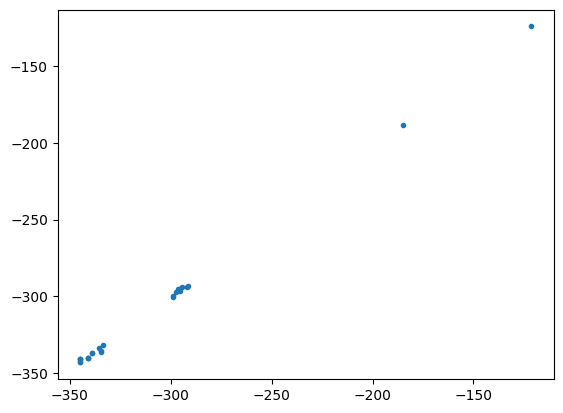

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
%matplotlib inline
df = pd.read_csv('AI-MLFF-energy-mlearn_Si-test-mae.csv')
plt.plot(df.target,df.prediction,'.')
print(mean_absolute_error(df.target,df.prediction))

0.09704879446412072


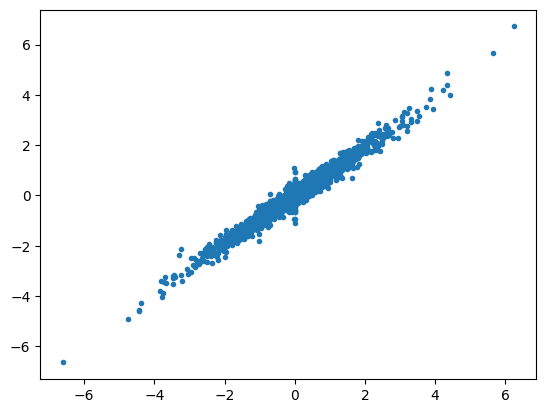

In [ ]:
df = pd.read_csv('AI-MLFF-forces-mlearn_Si-test-multimae.csv.zip')
target = np.concatenate(df.target.apply(lambda x:np.array(x.split(';'),dtype='float')).values)
pred= np.concatenate(df.prediction.apply(lambda x:np.array(x.split(';'),dtype='float')).values)
print(mean_absolute_error(target,pred))
plt.plot(target,pred,'.')


In [ ]:
# from ase.stress import voigt_6_to_full_3x3_stress

# df = pd.read_csv('AI-MLFF-stresses-mlearn_Si-test-multimae.csv.zip')
# target = np.concatenate(df.target.apply(lambda x:(np.array(x.split(';'),dtype='float')))).flatten()
# pred = 160*3*np.concatenate(df.prediction.apply(lambda x:(np.array(x.split(';'),dtype='float')))).flatten()
# print(mean_absolute_error(target,pred))
# plt.plot(target,pred,'.')


Obtaining 3D dataset 76k ...
Reference:https://www.nature.com/articles/s41524-020-00440-1
Other versions:https://doi.org/10.6084/m9.figshare.6815699


100%|██████████| 40.8M/40.8M [00:03<00:00, 11.9MiB/s]


Loading the zipfile...
Loading completed.
424.81972271645014


Text(0, 0.5, 'Total energy (eV)')

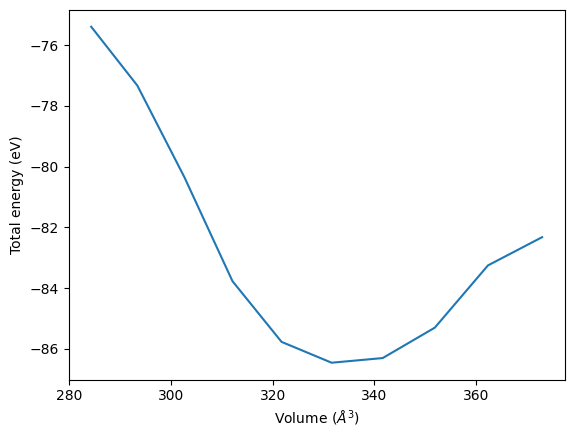

In [ ]:
from ase.eos import EquationOfState
from ase.units import kJ
from jarvis.db.figshare import get_jid_data
from jarvis.core.atoms import Atoms
import matplotlib.pyplot as plt
%matplotlib inline
atoms=Atoms.from_dict(get_jid_data(jid='JVASP-1002',dataset='dft_3d')['atoms']).make_supercell([2,2,2])# get_conventional_atoms
#dx=np.arange(-0.1, 0.1, 0.01)
dx=np.arange(-0.05, 0.05, 0.01)
y = []
vol = []
for i in dx:
    s1 = atoms.strain_atoms(i)
    energy, forces, stress = get_pred(atoms=s1)
    y.append(energy)
    vol.append(s1.volume)
x = np.array(dx)
y = np.array(y)
eos = EquationOfState(vol, y, eos="murnaghan")
v0, e0, B = eos.fit()
kv = B / kJ * 1.0e24  # , 'GPa')
print(kv)
plt.plot(vol,y)
plt.xlabel('Volume ($\AA^3$)')
plt.ylabel('Total energy (eV)')


In [ ]:
from jarvis.io.vasp.inputs import Poscar
from ase.constraints import ExpCellFilter
from ase.optimize.fire import FIRE
from jarvis.core.atoms import ase_to_atoms
from ase.filters import FrechetCellFilter

poscar="""System
1.0
5.0 0.0 0.0
-0.0 5.0 0.0
0.0 0.0 5.0
Si
8
direct
0.25 0.75 0.25 Si
0.0 0.0 0.5 Si
0.25 0.25 0.75 Si
0.0 0.5 0.0 Si
0.75 0.75 0.75 Si
0.5 0.0 0.0 Si
0.75 0.25 0.25 Si
0.5 0.5 0.5 Si
"""
# 5.49363
atoms=Poscar.from_string(poscar).atoms


def general_relaxer(atoms="", calculator="", fmax=0.05, steps=150,relax=True):
    ase_atoms = atoms.ase_converter()
    ase_atoms.calc = calculator
    if not relax:
         return ase_atoms.get_potential_energy()
    #ase_atoms = ExpCellFilter(ase_atoms)
    ase_atoms = FrechetCellFilter(ase_atoms)
    dyn = FIRE(ase_atoms)
    dyn.run(fmax=fmax, steps=steps)
    return ase_to_atoms(ase_atoms.atoms)
opt = general_relaxer(atoms=atoms,calculator=calc)
print(opt)


      Step     Time          Energy          fmax
FIRE:    0 03:52:11      -38.338039        0.000001
System
1.0
5.0 0.0 0.0
-0.0 5.0 0.0
0.0 0.0 5.0
Si 
8 
direct
0.25 0.75 0.25 Si
0.0 0.0 0.5 Si
0.25 0.25 0.75 Si
0.0 0.5 0.0 Si
0.75 0.75 0.75 Si
0.5 0.0 0.0 Si
0.75 0.25 0.25 Si
0.5 0.5 0.5 Si



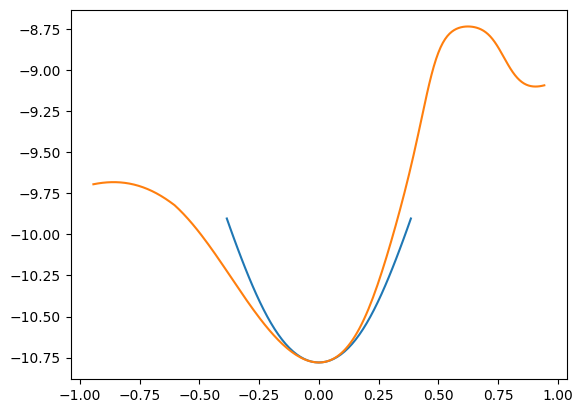

In [ ]:
#Check translationally equivariant
from ase import Atom, Atoms
import numpy as np
import matplotlib.pyplot as plt


A = 2.7223*np.array([[1,1,0],[1,0,1],[0,1,1]])
atoms_si = Atoms([Atom('Si', (0, 0, 0)), Atom('Si', (0.25, 0.25, 0.25))], cell = A, pbc=True)

atoms_si.set_tags(np.ones(len(atoms_si)))
atoms_si.calc = calc

atoms_si.set_scaled_positions(np.array([[0,0,0],[0.25, 0.25, 0.25]]))

#"""
en = []
dist = []
for a in np.linspace(-0.1,  0.1, 51):
    atoms_si.set_scaled_positions(np.array([[a,0,0],[0.25, 0.25, 0.25]]))
    e = atoms_si.get_potential_energy()
    en.append(e)
    dist.append(np.sign(a)*np.sqrt(np.sum(np.dot(A, [a,0,0])**2)))
en_111_more = []
dist_111_more = []
for a in np.linspace(-0.1,  0.1, 201):
    atoms_si.set_scaled_positions(np.array([[a,a,a],[0.25, 0.25, 0.25]]))
    e = atoms_si.get_potential_energy()
    en_111_more.append(e)
    dist_111_more.append(np.sign(a)*np.sqrt(np.sum(np.dot(A, [a,a,a])**2)))
plt.plot(dist,en)
plt.plot(dist_111_more,en_111_more)
#plt.ylim([-10.7,-10])
# plt.savefig('inv.png')
# plt.close()
#"""




Melt quench

In [ ]:
%%time
import ase,os
from ase.md.velocitydistribution import MaxwellBoltzmannDistribution
from ase.md.nvtberendsen import NVTBerendsen
from jarvis.db.figshare import get_jid_data
from jarvis.core.atoms import Atoms, ase_to_atoms
calc = AlignnAtomwiseCalculator(path='OutputDir',device=device, force_mult_batchsize=False)
!rm */*.traj
def ensure_cell_size(ase_atoms, min_size):
    """Ensure that all cell dimensions are at least min_size."""
    cell_lengths = ase_atoms.get_cell().lengths()
    scale_factors = np.ceil(min_size / cell_lengths).astype(int)
    supercell_dims = [max(1, scale) for scale in scale_factors]
    return supercell_dims

calculator = calc
jid = 'JVASP-1002'
atoms=Atoms.from_dict(get_jid_data(jid=jid,dataset='dft_3d')['atoms']).get_conventional_atoms
relaxed_atoms=atoms
ase_atoms = atoms.ase_converter()
dim = ensure_cell_size(ase_atoms, min_size=10.0)
supercell = relaxed_atoms.make_supercell_matrix(dim)
ase_atoms = supercell.ase_converter()
ase_atoms.calc = calculator

dt = 1 * ase.units.fs
temp0, nsteps0 = 3500, 1000
temp1, nsteps1 = 300, 2000
taut = 20 * ase.units.fs
if not os.path.exists("output_melt"):
    os.mkdir("output_melt")
trj = os.path.join("output_melt", f"{jid}_melt.traj")

# Initialize velocities and run the first part of the MD simulation


MaxwellBoltzmannDistribution(ase_atoms, temp0 * ase.units.kB)
dyn = NVTBerendsen(ase_atoms, dt, temp0, taut=taut, trajectory=trj)

def myprint():
    message = f"time={dyn.get_time() / ase.units.fs: 5.0f} fs T={ase_atoms.get_temperature(): 3.0f} K"
    print(message)
dyn.attach(myprint, interval=20)
dyn.run(nsteps0)

# Cool down to room temperature
dyn.set_temperature(temp1)
dyn.run(nsteps1)

# Convert back to JARVIS atoms and save the final structure
final_atoms = ase_to_atoms(ase_atoms)
poscar_filename = os.path.join(
    "output_melt", f"POSCAR_{jid}_quenched_{'alignn'}.vasp"
)
from ase.io import write

write(poscar_filename, final_atoms.ase_converter(), format="vasp")
# self.log(f"MD simulation completed. Final structure saved to {poscar_filename}")
# self.job_info["quenched_atoms"] = final_atoms.to_dict()


rm: cannot remove '*/*.traj': No such file or directory


/content/alignn/alignn/ff/calculators.py:256: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load(


Obtaining 3D dataset 76k ...
Reference:https://www.nature.com/articles/s41524-020-00440-1
Other versions:https://doi.org/10.6084/m9.figshare.6815699
Loading the zipfile...
Loading completed.


/usr/local/lib/python3.11/dist-packages/jarvis/analysis/structure/spacegroup.py:315: DeprecationWarning: dict interface is deprecated. Use attribute interface instead
  n = self._dataset["number"]
/usr/local/lib/python3.11/dist-packages/ase/md/md.py:54: FutureWarning: Specify the temperature in K using the 'temperature_K' argument
  warnings.warn(FutureWarning(w))


time=    0 fs T= 3438 K
time=   20 fs T= 1819 K
time=   40 fs T= 2768 K
time=   60 fs T= 2396 K
time=   80 fs T= 2951 K
time=  100 fs T= 3140 K
time=  120 fs T= 3000 K
time=  140 fs T= 3384 K
time=  160 fs T= 3300 K
time=  180 fs T= 3607 K
time=  200 fs T= 3242 K
time=  220 fs T= 3555 K
time=  240 fs T= 3312 K
time=  260 fs T= 3356 K
time=  280 fs T= 3698 K
time=  300 fs T= 3185 K
time=  320 fs T= 3598 K
time=  340 fs T= 3510 K
time=  360 fs T= 3397 K
time=  380 fs T= 3632 K
time=  400 fs T= 3350 K
time=  420 fs T= 3498 K
time=  440 fs T= 3465 K
time=  460 fs T= 3573 K
time=  480 fs T= 3501 K
time=  500 fs T= 3479 K
time=  520 fs T= 3585 K
time=  540 fs T= 3486 K
time=  560 fs T= 3455 K
time=  580 fs T= 3487 K
time=  600 fs T= 3459 K
time=  620 fs T= 3582 K
time=  640 fs T= 3573 K
time=  660 fs T= 3470 K
time=  680 fs T= 3331 K
time=  700 fs T= 3581 K
time=  720 fs T= 3671 K
time=  740 fs T= 3521 K
time=  760 fs T= 3463 K
time=  780 fs T= 3432 K
time=  800 fs T= 3432 K
time=  820 fs T=

System
1.0
10.98726 0.0 0.0
0.0 10.98726 0.0
0.0 0.0 10.98726
Si 
64 
direct
0.04244463658876569 0.6208851757620336 -0.28334015869180373 Si
0.5195580490655571 0.570985219556184 0.46437585787186686 Si
-0.0037607605208824584 0.9110194466800438 0.22797213191923166 Si
-0.05860901864391368 0.6553255203331504 0.9205913694438425 Si
0.5815262954622346 0.8415313631444841 -0.24212969289055092 Si
0.7176403575802269 0.6207251157529384 0.5266237074496879 Si
0.0009473815066729529 0.6159147785334008 0.37386198625681644 Si
0.977463343084511 0.9783384729088296 0.7931383075482259 Si
-0.21349234447907767 -0.4880931204022131 -0.12506255478071274 Si
0.027037347972312668 -0.2399108423243904 0.5511100836879381 Si
0.3742128811801216 0.28913565508853495 0.14235051037894042 Si
0.09663037815306977 0.49651426031084894 1.009718257031911 Si
0.47044121281031537 -0.3809802251176272 0.2570625762481084 Si
0.2105408009833099 0.11161550259112228 1.4651027637335958 Si
0.5474444821615472 -0.06336159785382785 0.062198408147

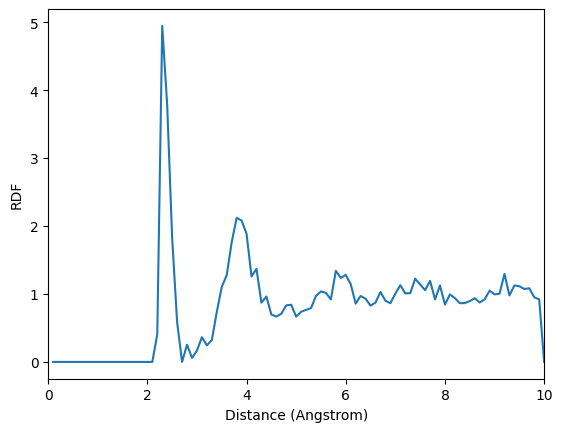

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from jarvis.core.atoms import Atoms
from ase.io.trajectory import Trajectory
from jarvis.core.atoms import ase_to_atoms
from ase.visualize.plot import plot_atoms
from matplotlib.animation import FuncAnimation
from ase.geometry.analysis import Analysis


traj = Trajectory('output_melt/JVASP-1002_melt.traj')


fig, ax = plt.subplots(1, 3, figsize=(9,3), tight_layout=True)

t = np.arange(nsteps0+nsteps1+1) * dt
temp = [atoms.get_temperature() for atoms in traj]

nframes = 20



def update(iframe):
    idx = int((nsteps0+nsteps1)*iframe/nframes)

    ax[0].clear()
    ax[0].set_title('Temperature')
    ax[0].set_xlabel('time (fs)')
    ax[0].set_ylabel('T (K)')
    ax[0].plot(t, temp)
    ax[0].plot(t[idx], temp[idx], marker='X', markersize=10)

    ax[1].clear()
    ax[1].set_title('Structure')
    ax[1].axis('off')
    plot_atoms(traj[idx], ax=ax[1], rotation='45x,45y')

    distribution, distance = Analysis(traj[idx]).get_rdf(rmax=5., nbins=100, return_dists=True)[0]
    ax[2].clear()
    ax[2].set_title('RDF')
    ax[2].set_ylim((0,10))
    ax[2].set_xlabel('distance (A))')
    ax[2].set_ylabel('distribution')
    ax[2].plot(distance, distribution, color='darkblue')
ani = FuncAnimation(fig, update, np.arange(nframes), blit=False, interval=250.)
ani.save('ani_si_2k.gif', writer="imagemagick")
plt.close()

atoms=ase_to_atoms(traj[-1])
print(atoms)
dists=[]
for i in atoms.get_all_neighbors(r=10):
    for j in i:
      dists.append(j[2])
dists=np.array(dists)
hist, bins = np.histogram(dists, bins=np.arange(0.1, 10.2, 0.1))
number_density = atoms.num_atoms / atoms.volume
shell_vol = (
            4.0
            / 3.0
            * np.pi
            * (np.power(bins[1:], 3) - np.power(bins[:-1], 3))
        )
rdf = (
            hist / shell_vol / number_density / atoms.num_atoms
        )
plt.plot(bins[:-1], rdf)
plt.xlim([0,10])
plt.xlabel('Distance (Angstrom)')
plt.ylabel('RDF')
# plt.savefig('rdf.png')
# plt.close()
plt.show()


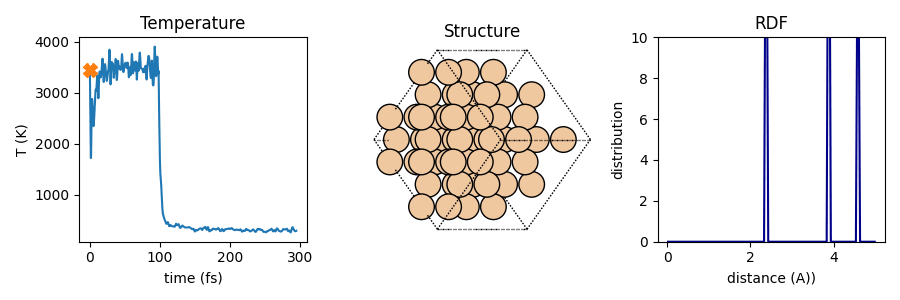

In [ ]:
from IPython.display import Image, display

display(Image(filename='ani_si_2k.gif'))


In [ ]:
from ase.visualize import view
view(atoms.ase_converter(),viewer='x3d')

In [ ]:
atoms.plot_atoms()


Scaling

In [ ]:
from ase.build.supercells import make_supercell
import numpy as np
import time
from alignn.ff.ff import AlignnAtomwiseCalculator, default_path, ev_curve
import pandas as pd
import numpy as np
import zipfile
import json
import os
import glob
import matplotlib.pyplot as plt
from ase.stress import full_3x3_to_voigt_6_stress, voigt_6_to_full_3x3_stress
from ase import Atoms,Atom
A = 2.7223*np.array([[1,1,0],[1,0,1],[0,1,1]])
model_path = "OutputDir"
dir_name = model_path
calc = AlignnAtomwiseCalculator(
    path=model_path,
    force_mult_natoms=False,
    stress_wt=0.3,
    device='cuda'
)
atoms_si = Atoms([Atom('Si', (0, 0, 0)), Atom('Si', (0.25, 0.25, 0.25))], cell = A, pbc=True)
atoms_si.calc = calc
en = atoms_si.get_potential_energy()
numbers = np.arange(1,10,1)
times = []
natoms=[]
for i in numbers:

  sc=make_supercell(atoms_si, [[i,0,0],[0,i,0],[0,0,i]])
  t1=time.time()
  sc.calc = calc

  en = sc.get_potential_energy()/len(sc)
  t2=time.time()

  times.append(t2-t1)
  natoms.append(len(sc))
  print(i,len(sc),en,t2-t1)

1 2 -4.506657123565674 0.033423423767089844
2 16 -4.507745265960693 0.04045534133911133
3 54 -4.507744400589554 0.052483320236206055
4 128 -4.507744789123535 0.0859062671661377
5 250 -4.5077412109375 0.2188270092010498
6 432 -4.507741857458044 0.522637128829956
7 686 -4.507739186634475 1.1942861080169678
8 1024 -4.507747173309326 2.068328857421875
9 1458 -4.507742841220851 6.196353912353516


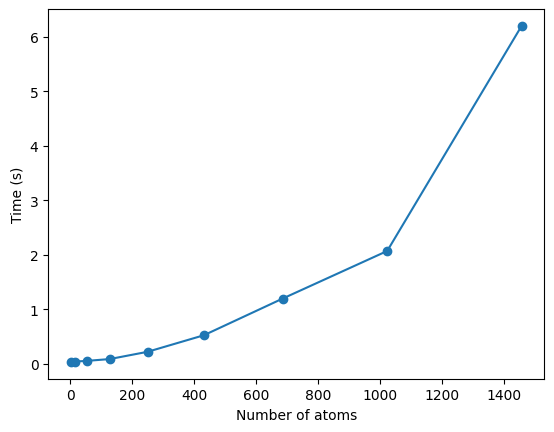

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(natoms,times,'o-')
plt.xlabel('Number of atoms')
plt.ylabel('Time (s)')
plt.show()

Training analysis

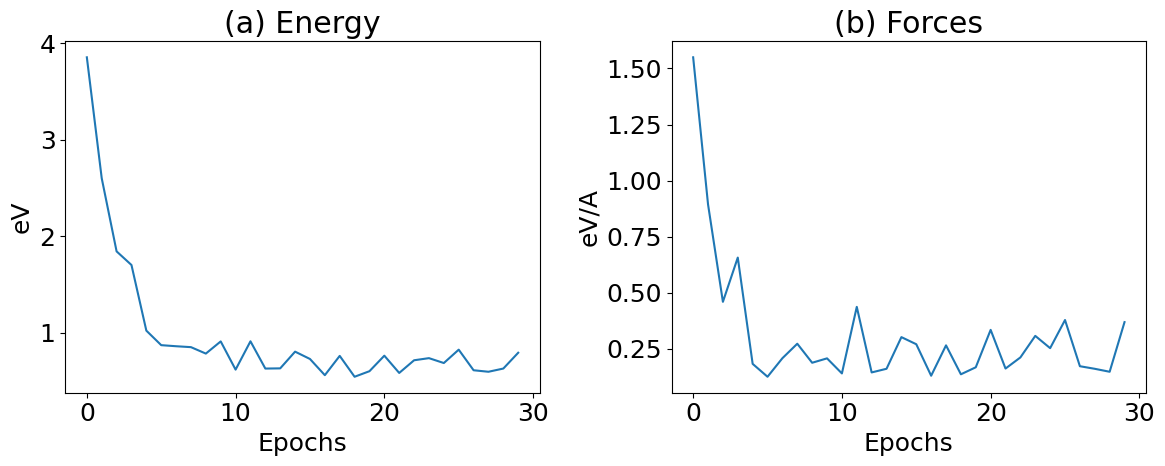

[0.7926813811063766, 0.3687313422560692, 0, 0.42395004257559776, 0, 0]


In [ ]:
from jarvis.db.jsonutils import loadjson
from matplotlib.gridspec import GridSpec
import numpy as np
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import os
%matplotlib inline
# Plot training hostory for validation set
dir_name = "OutputDir"
json_path = os.path.join(dir_name, "history_val.json")
v = loadjson(json_path)
ens = []
fs = []
for i in v:
    ens.append(i[0])
    fs.append(i[1])
the_grid = GridSpec(1, 2)
plt.rcParams.update({"font.size": 18})
plt.figure(figsize=(12, 5))
plt.subplot(the_grid[0])
plt.title("(a) Energy")
plt.plot(ens)
plt.xlabel("Epochs")
plt.ylabel("eV")
plt.subplot(the_grid[1])
plt.title("(b) Forces")
plt.plot(fs)
plt.xlabel("Epochs")
plt.ylabel("eV/A")
plt.tight_layout()
plt.show()
# plt.savefig("history.png")
# plt.close()
print(v[-1])

Val
Baseline MAE: eV 0.29931997259457904
MAE eV 0.03399984041849772
Test
Baseline MAE: eV/A 0.574290006651727
MAE eV/A 0.10128897683332114


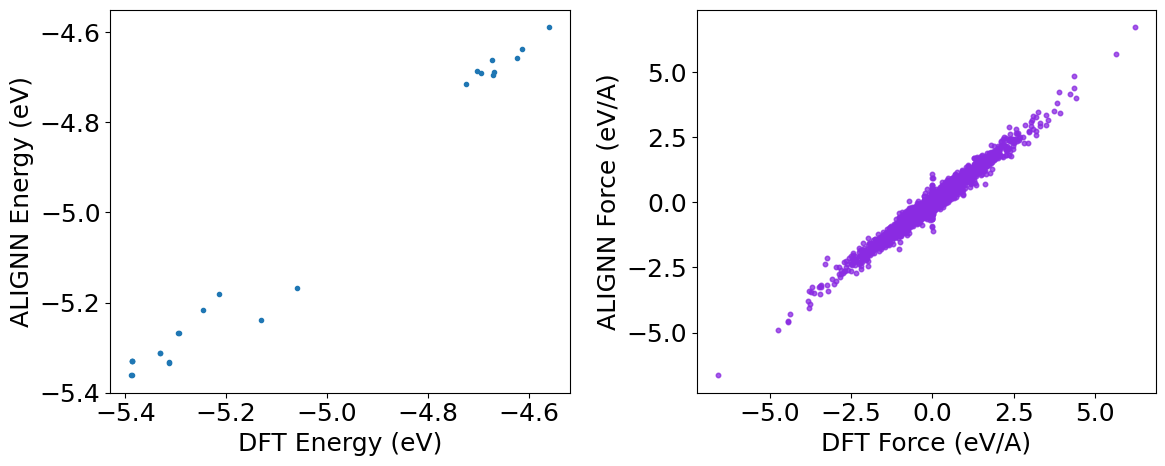

In [ ]:
the_grid = GridSpec(1, 2)
json_path = os.path.join(dir_name, "Val_results.json")
test = loadjson(json_path)
plt.rcParams.update({"font.size": 18})
plt.figure(figsize=(12, 5))
plt.subplot(the_grid[0])
xx = []
yy = []
factor = 1
for i in test:
    for j, k in zip(i["target_out"], i["pred_out"]):
        xx.append(j)
        yy.append(k)
xx = np.array(xx) * factor
yy = np.array(yy) * factor

x_bar = np.mean(xx)
baseline_mae = mean_absolute_error(
    np.array(xx),
    np.array([x_bar for i in range(len(xx))]),
)
print("Val")
print("Baseline MAE: eV", baseline_mae)
print("MAE eV", mean_absolute_error(xx, yy))

plt.plot(xx, yy, ".")
plt.ylabel("ALIGNN Energy (eV)")
plt.xlabel("DFT Energy (eV)")
plt.subplot(the_grid[1])
xx = []
yy = []
for i in test:
    for j, k in zip(i["target_grad"], i["pred_grad"]):
        for m, n in zip(j, k):
            xx.append(m)
            yy.append(n)
xx = np.array(xx) * factor
yy = np.array(yy) * factor

x_bar = np.mean(xx)
baseline_mae = mean_absolute_error(
    np.array(xx),
    np.array([x_bar for i in range(len(xx))]),
)
print("Test")
print("Baseline MAE: eV/A", baseline_mae)
print("MAE eV/A", mean_absolute_error(xx, yy))
plt.scatter(xx, yy, c="blueviolet", s=10, alpha=0.5)

plt.scatter(xx, yy, c="blueviolet", s=10, alpha=0.5)
plt.ylabel("ALIGNN Force (eV/A)")
plt.xlabel("DFT Force (eV/A)")
plt.tight_layout()
plt.show()
# plt.savefig("val.png")
# plt.close()


Equation of state

## Phonon bandstructure

In [ ]:
# import locale
# locale.getpreferredencoding = lambda: "UTF-8"

Obtaining 3D dataset 76k ...
Reference:https://www.nature.com/articles/s41524-020-00440-1
Other versions:https://doi.org/10.6084/m9.figshare.6815699
Loading the zipfile...
Loading completed.


/usr/local/lib/python3.11/dist-packages/jarvis/analysis/structure/spacegroup.py:315: DeprecationWarning:

dict interface is deprecated. Use attribute interface instead



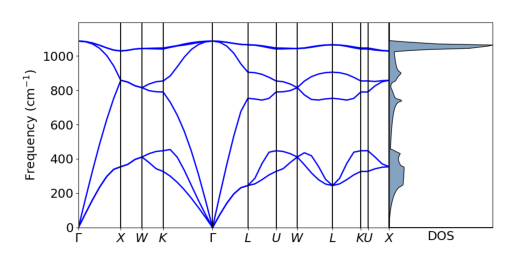

In [ ]:
from alignn.ff.ff import phonons
from jarvis.core.atoms import ase_to_atoms
from jarvis.core.atoms import Atoms
from jarvis.db.figshare import get_jid_data
import torch
torch.cuda.is_available = lambda: False
dir_name="OutputDir"
ph_path=dir_name
atoms=Atoms.from_dict(get_jid_data(jid='JVASP-1002',dataset='dft_3d')['atoms'])
ph=phonons(model_path=ph_path,atoms=atoms)
%matplotlib inline
plt.axis('off')
plt.imshow(plt.imread("phonopy_bands.png"))
plt.show()

You can compare the bandstructure here: https://www.ctcms.nist.gov/~knc6/static/JARVIS-DFT/JVASP-1002.xml#elastic_tensor

dict_keys(['temperatures', 'free_energy', 'entropy', 'heat_capacity'])


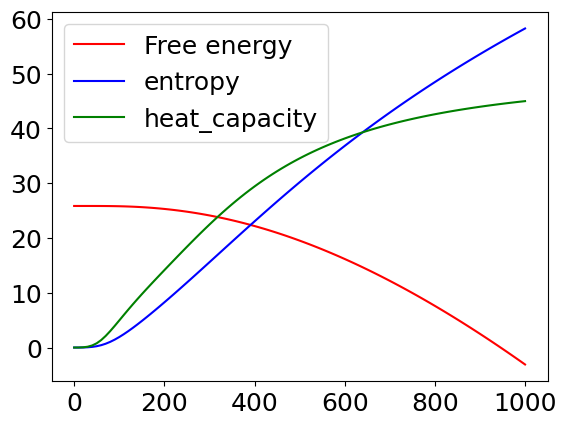

In [ ]:
tmp_ph=ph
ph.run_mesh(mesh=[20, 20, 20])
ph.run_thermal_properties(t_step=10, t_max=1000, t_min=0)
tprop_dict = ph.get_thermal_properties_dict()
plt.plot(tprop_dict['temperatures'],tprop_dict['free_energy'],label='Free energy',color='red')
plt.plot(tprop_dict['temperatures'],tprop_dict['entropy'],label='entropy',color='blue')
plt.plot(tprop_dict['temperatures'],tprop_dict['heat_capacity'],label='heat_capacity',color='green')
plt.legend()
print(tprop_dict.keys())

# See https://phonopy.github.io/phonopy/examples.html

Elastic constants

In [ ]:
!pip install -q elastic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 627.0/627.0 kB 24.8 MB/s eta 0:00:00


In [ ]:
from elastic import get_elementary_deformations, get_elastic_tensor
import elastic
import ase
from jarvis.core.atoms import ase_to_atoms
from jarvis.core.atoms import Atoms
from jarvis.db.figshare import get_jid_data

ph_path=dir_name
atoms=Atoms.from_dict(get_jid_data(jid='JVASP-1002',dataset='dft_3d')['atoms']).get_conventional_atoms
ase_atoms = atoms.ase_converter()
ase_atoms.calc = calc
systems = get_elementary_deformations(ase_atoms)
cij_order = elastic.elastic.get_cij_order(ase_atoms)
Cij, Bij = get_elastic_tensor(ase_atoms, systems)
for i, j in zip(cij_order, Cij):
    print(i, j / ase.units.GPa)

Obtaining 3D dataset 76k ...
Reference:https://www.nature.com/articles/s41524-020-00440-1
Other versions:https://doi.org/10.6084/m9.figshare.6815699
Loading the zipfile...
Loading completed.


/usr/local/lib/python3.11/dist-packages/jarvis/analysis/structure/spacegroup.py:315: DeprecationWarning:

dict interface is deprecated. Use attribute interface instead



C_11 38.24892008304601
C_12 17.477969050407413
C_44 23.903344369525144


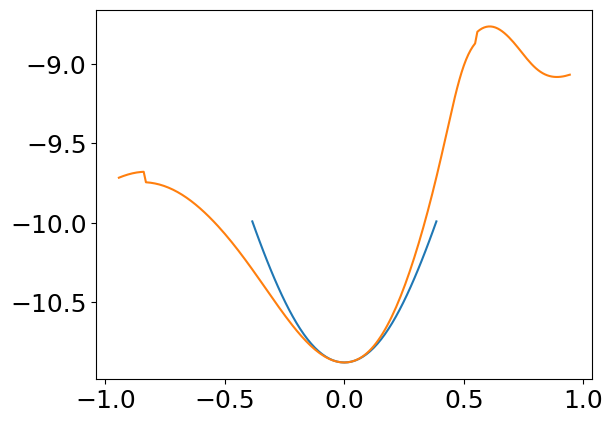

In [ ]:
#Check translationally equivariant
from ase import Atom, Atoms
import numpy as np
import matplotlib.pyplot as plt


A = 2.7223*np.array([[1,1,0],[1,0,1],[0,1,1]])
atoms_si = Atoms([Atom('Si', (0, 0, 0)), Atom('Si', (0.25, 0.25, 0.25))], cell = A, pbc=True)

atoms_si.set_tags(np.ones(len(atoms_si)))
atoms_si.calc = calc

atoms_si.set_scaled_positions(np.array([[0,0,0],[0.25, 0.25, 0.25]]))

#"""
en = []
dist = []
for a in np.linspace(-0.1,  0.1, 51):
    atoms_si.set_scaled_positions(np.array([[a,0,0],[0.25, 0.25, 0.25]]))
    e = atoms_si.get_potential_energy()
    en.append(e)
    dist.append(np.sign(a)*np.sqrt(np.sum(np.dot(A, [a,0,0])**2)))
en_111_more = []
dist_111_more = []
for a in np.linspace(-0.1,  0.1, 201):
    atoms_si.set_scaled_positions(np.array([[a,a,a],[0.25, 0.25, 0.25]]))
    e = atoms_si.get_potential_energy()
    en_111_more.append(e)
    dist_111_more.append(np.sign(a)*np.sqrt(np.sum(np.dot(A, [a,a,a])**2)))
plt.plot(dist,en)
plt.plot(dist_111_more,en_111_more)
#plt.ylim([-10.7,-10])
# plt.savefig('kevin.png')
# plt.close()
#"""




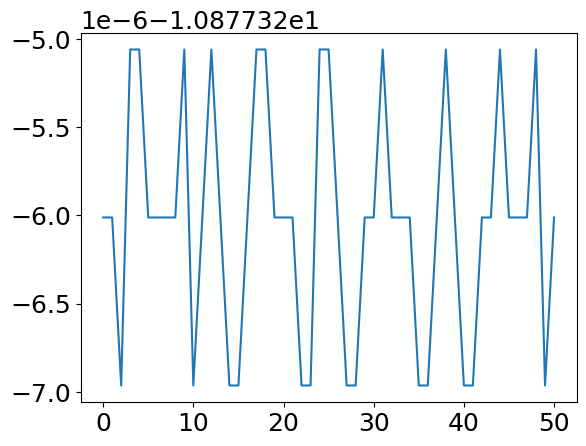

In [ ]:
#Check rotationally equivariant
atoms_si = Atoms([Atom('Si', (0, 0, 0)), Atom('Si', (0.25, 0.25, 0.25))], cell = A, pbc=True)
atoms_si.calc = calc
#translations
en_trans = []
for a in np.linspace(-0.1,  0.1, 51):
    atoms_si.set_scaled_positions(np.array([[a,a,a],[a+0.25, a+0.25, a+0.25]]))
    e = atoms_si.get_potential_energy()
    en_trans.append(e)
plt.plot(en_trans)

Interface design, gamma surface plot

In [ ]:
!pip install -q git+https://github.com/usnistgov/intermat.git@develop

  Preparing metadata (setup.py) ... done


In [ ]:
# Conventional cells
poscar_1= """JVASP1002
1.0
5.49363 0.0 0.0
-0.0 5.49363 0.0
0.0 0.0 5.49363
Si
8
direct
0.25 0.75 0.25 Si
0.0 0.0 0.5 Si
0.25 0.25 0.75 Si
0.0 0.5 0.0 Si
0.75 0.75 0.75 Si
0.5 0.0 0.0 Si
0.75 0.25 0.25 Si
0.5 0.5 0.5 Si
"""

poscar_2 = """JVASP-1174
1.0
5.73163 0.0 0.0
-0.0 5.73163 0.0
0.0 0.0 5.73163
Ga As
4 4
direct
0.0 0.0 0.0 Ga
0.0 0.5 0.5 Ga
0.5 0.0 0.5 Ga
0.5 0.5 0.0 Ga
0.25 0.75 0.75 As
0.25 0.25 0.25 As
0.75 0.75 0.25 As
0.75 0.25 0.75 As
"""


In [ ]:
from jarvis.db.jsonutils import loadjson
from jarvis.core.atoms import Atoms
from jarvis.io.vasp.inputs import Poscar
from intermat.generate import InterfaceCombi
import matplotlib.pyplot as plt

atoms1 = Poscar.from_string(poscar_1).atoms
atoms2 = Poscar.from_string(poscar_1).atoms #Poscar.from_string(poscar_2).atoms

x = InterfaceCombi(
    film_indices=[[1, 1, 0]],
    subs_indices=[[1, 1, 0]],
    vacuum_interface=2,
    film_mats=[atoms1],
    subs_mats=[atoms2],
    disp_intvl=0.0,
    from_conventional_structure_film=False,
    from_conventional_structure_subs=False,
    max_area=300,
    ltol=0.08,

)

structs = x.generate()
heterostructure_atoms=Atoms.from_dict(structs[0]['generated_interface'])
film_atoms=Atoms.from_dict(structs[0]['film_surf'])
surf_atoms=Atoms.from_dict(structs[0]['subs_surf'])


Obtaining 3D dataset 76k ...
Reference:https://www.nature.com/articles/s41524-020-00440-1
Other versions:https://doi.org/10.6084/m9.figshare.6815699
Loading the zipfile...
Loading completed.


/usr/local/lib/python3.10/site-packages/intermat/generate.py:52: RuntimeWarning:

invalid value encountered in scalar divide

/usr/local/lib/python3.10/site-packages/intermat/generate.py:55: RuntimeWarning:

invalid value encountered in scalar divide



In [ ]:
print(heterostructure_atoms)

System
1.0
-0.0 5.49363 -0.0
7.76917 -0.0 -0.0
-0.0 -0.0 -25.922915131649273
Si 
48 
direct
-0.375 0.7499996189418925 0.5482198764645343 bottom
-0.375 -0.24999987298063056 0.37685447807712513 top
-0.125 0.9999994919225232 0.07715189624376284 top
-0.125 0.4999997459612616 0.2270031871604441 top
-0.125 9.251858538542978e-18 0.37685447807712513 top
0.125 9.251858538542978e-18 0.15207754170210352 top
0.125 -0.4999997459612613 0.30192883261878467 top
0.125 -0.9999994919225226 0.4517801235354659 top
0.375 0.24999987298063067 0.15207754170210352 top
0.375 -0.24999987298063084 0.3019288326187848 top
-0.375 0.24999987298063067 0.2270031871604441 top
0.375 -0.7499996189418927 0.4517801235354659 top
0.125 -2.1279274638648835e-16 0.3019288326187848 top
0.125 -0.4999997459612617 0.4517801235354659 top
0.375 0.7499996189418926 0.15207754170210352 top
0.375 0.24999987298063067 0.3019288326187848 top
0.375 -0.24999987298063084 0.4517801235354659 top
-0.375 0.24999987298063067 0.07715189624376284 top
-

Note it can be a high energy if slabs are randomly put together, need xy-plane scan

(0.0, 8.281078312500002, 0.0, 27.219060888231738)

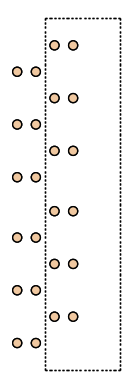

In [ ]:
from ase.visualize.plot import plot_atoms
import matplotlib.pyplot as plt
%matplotlib inline
plot_atoms(heterostructure_atoms.ase_converter(),  radii=0.3, rotation=('90x,90y,0z'))
plt.axis('off')


In [ ]:
from jarvis.db.jsonutils import loadjson
from jarvis.core.atoms import Atoms
from jarvis.io.vasp.inputs import Poscar
from intermat.generate import InterfaceCombi
import matplotlib.pyplot as plt

atoms1 = Poscar.from_string(poscar_1).atoms
atoms2 = Poscar.from_string(poscar_1).atoms

# disp_intvl = 0.1 for xy-plane scan
x = InterfaceCombi(
    film_indices=[[1, 1, 0]],
    subs_indices=[[1, 1, 0]],
    vacuum_interface=2,
    film_mats=[atoms1],
    subs_mats=[atoms2],
    disp_intvl=0.1,
    from_conventional_structure_film=False,
    from_conventional_structure_subs=False,
    max_area=300,
    ltol=0.08,

)

structs = x.generate()
extra_params={}
extra_params["alignn_params"] ={}
extra_params["alignn_params"]["model_path"] = dir_name
wads = x.calculate_wad(method='alignn_ff',extra_params=extra_params)
# heterostructure_atoms=Atoms.from_dict(structs[0]['generated_interface'])
# film_atoms=Atoms.from_dict(structs[0]['film_surf'])
# surf_atoms=Atoms.from_dict(structs[0]['subs_surf'])


Obtaining 3D dataset 76k ...
Reference:https://www.nature.com/articles/s41524-020-00440-1
Other versions:https://doi.org/10.6084/m9.figshare.6815699
Loading the zipfile...
Loading completed.
len generated 121


  0%|          | 0/121 [00:00<?, ?it/s]/usr/local/lib/python3.10/site-packages/alignn/ff/ff.py:274: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.

100%|██████████| 121/121 [0

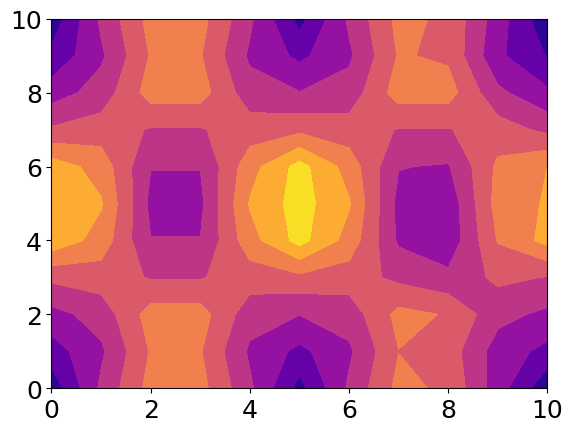

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
X = x.X
Y = x.Y
wads = np.array(wads).reshape(len(X), len(Y))
wads = np.array(x.wads["wads"])
index = np.argmin(wads)
combined_atoms = Atoms.from_dict(
    x.generated_interfaces[index]["generated_interface"]
)
wads = np.array(wads).reshape(len(X), len(Y))
plt.contourf(wads,cmap='plasma')


In [ ]:
print(combined_atoms)

System
1.0
-0.0 5.49363 -0.0
7.76917 -0.0 -0.0
-0.0 -0.0 -25.922915131649273
Si 
48 
direct
-0.375 1.7499996189418925 0.5482198764645343 bottom
-0.375 -0.24999987298063056 0.37685447807712513 top
-0.125 0.9999994919225232 0.07715189624376284 top
-0.125 0.4999997459612616 0.2270031871604441 top
-0.125 9.251858538542978e-18 0.37685447807712513 top
0.125 9.251858538542978e-18 0.15207754170210352 top
0.125 -0.4999997459612613 0.30192883261878467 top
0.125 -0.9999994919225226 0.4517801235354659 top
0.375 0.24999987298063067 0.15207754170210352 top
0.375 -0.24999987298063084 0.3019288326187848 top
-0.375 0.24999987298063067 0.2270031871604441 top
0.375 -0.7499996189418927 0.4517801235354659 top
0.125 -2.1279274638648835e-16 0.3019288326187848 top
0.125 -0.4999997459612617 0.4517801235354659 top
0.375 0.7499996189418926 0.15207754170210352 top
0.375 0.24999987298063067 0.3019288326187848 top
0.375 -0.24999987298063084 0.4517801235354659 top
-0.375 0.24999987298063067 0.07715189624376284 top
-

(0.0, 8.281078312500002, 0.0, 27.219060888231738)

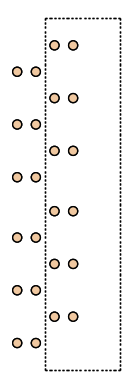

In [ ]:
# After xy plane scan we can see the diamond structure pattern continues,
# which is desirable for getting low energy structure
from ase.visualize.plot import plot_atoms
import matplotlib.pyplot as plt
%matplotlib inline
plot_atoms(combined_atoms.ase_converter(),  radii=0.3, rotation=('90x,90y,0z'))
plt.axis('off')


In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Surface(z=wads)])

# fig = go.Figure(data=[go.Contour(z=res['wads'])])
#fig.write_html("file2.html")
fig.show()

General optimization from POSCAR

In [ ]:
from jarvis.io.vasp.inputs import Poscar
from ase.constraints import ExpCellFilter
from ase.optimize.fire import FIRE

def general_relaxer(atoms="", calculator="", fmax=0.05, steps=150,relax=True):
    ase_atoms = atoms.ase_converter()
    ase_atoms.calc = calculator
    if not relax:
         return ase_atoms.get_potential_energy()

    ase_atoms = ExpCellFilter(ase_atoms)

    dyn = FIRE(ase_atoms)
    dyn.run(fmax=fmax, steps=steps)
    return ase_to_atoms(ase_atoms.atoms)

pos="""Si2
1.0
3.3641499856336465 -2.5027128e-09 1.94229273881412
1.121382991333525 3.1717517190189715 1.9422927388141193
-2.5909987e-09 -1.8321133e-09 3.884586486670313
Si
2
Cartesian
3.92483875 2.77528125 6.7980237500000005
0.56069125 0.39646875 0.9711462500000001
"""
s = Poscar.from_string(pos).atoms.get_conventional_atoms
opt = general_relaxer(atoms=s,calculator=calc)
print(s)
print()
print(opt)

/usr/local/lib/python3.10/site-packages/spglib/spglib.py:115: DeprecationWarning:

dict interface (SpglibDataset['number']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead

/usr/local/lib/python3.10/site-packages/spglib/spglib.py:115: DeprecationWarning:

dict interface (SpglibDataset['international']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead

<ipython-input-62-a75ec3c887c6>:11: FutureWarning:

Import ExpCellFilter from ase.filters



      Step     Time          Energy          fmax
FIRE:    0 18:34:35      -43.618771        2.739389
FIRE:    1 18:34:35      -43.595402        3.101319
FIRE:    2 18:34:36      -43.648758        1.583631
FIRE:    3 18:34:36      -43.661453        0.889579
FIRE:    4 18:34:37      -43.662827        0.765869
FIRE:    5 18:34:38      -43.664829        0.537556
FIRE:    6 18:34:38      -43.666409        0.238770
FIRE:    7 18:34:39      -43.666748        0.087892
FIRE:    8 18:34:40      -43.666752        0.084967
FIRE:    9 18:34:41      -43.666756        0.079203
FIRE:   10 18:34:42      -43.666763        0.070797
FIRE:   11 18:34:43      -43.666775        0.060020
FIRE:   12 18:34:44      -43.666782        0.047221
System
1.0
5.49363 0.0 0.0
-0.0 5.49363 0.0
0.0 0.0 5.49363
Si 
8 
direct
0.25 0.75 0.25 Si
0.0 0.0 0.5 Si
0.25 0.25 0.75 Si
0.0 0.5 0.0 Si
0.75 0.75 0.75 Si
0.5 0.0 0.0 Si
0.75 0.25 0.25 Si
0.5 0.5 0.5 Si


System
1.0
5.560756380306879 7.479475099586995e-08 -9.738320827849

Scaling

In [ ]:
from ase.build.supercells import make_supercell
import numpy as np
import time
from alignn.ff.ff import AlignnAtomwiseCalculator, default_path, ev_curve
import pandas as pd
import numpy as np
import zipfile
import json
import os
import glob
import matplotlib.pyplot as plt
from ase.stress import full_3x3_to_voigt_6_stress, voigt_6_to_full_3x3_stress
from ase import Atoms,Atom
A = 2.7223*np.array([[1,1,0],[1,0,1],[0,1,1]])
model_path = "OutputDir"
dir_name = model_path
calc = AlignnAtomwiseCalculator(
    path=model_path,
    force_mult_natoms=False,
    force_multiplier=my_config['batch_size'],
    stress_wt=0.3,
)
atoms_si = Atoms([Atom('Si', (0, 0, 0)), Atom('Si', (0.25, 0.25, 0.25))], cell = A, pbc=True)
atoms_si.calc = calc
en = atoms_si.get_potential_energy()
numbers = np.arange(1,9,1)
times = []
natoms=[]
for i in numbers:

  sc=make_supercell(atoms_si, [[i,0,0],[0,i,0],[0,0,i]])
  t1=time.time()
  sc.calc = calc

  en = sc.get_potential_energy()/len(sc)
  t2=time.time()

  times.append(t2-t1)
  natoms.append(len(sc))
  print(i,len(sc),en,t2-t1)

/usr/local/lib/python3.10/site-packages/alignn/ff/ff.py:274: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.



1 2 -4.271064281463623 0.03654980659484863
2 16 -4.271986961364746 0.04268479347229004
3 54 -4.271986961364746 0.04944324493408203
4 128 -4.271987438201904 0.09003543853759766
5 250 -4.271985054016113 0.2321300506591797
6 432 -4.271986484527588 0.5468029975891113
7 686 -4.271985054016113 1.2063078880310059
8 1024 -4.271982192993164 2.3596749305725098


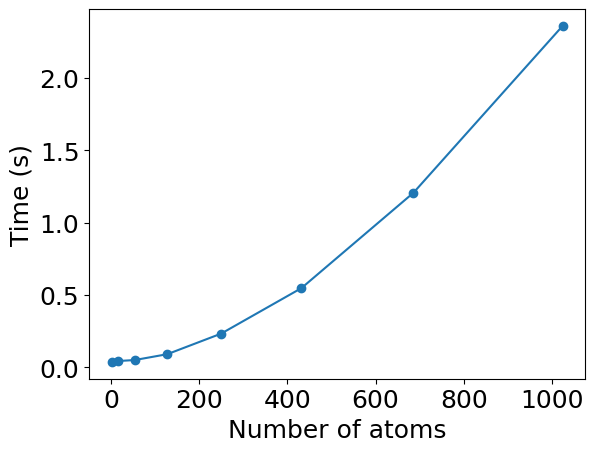

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(natoms,times,'o-')
plt.xlabel('Number of atoms')
plt.ylabel('Time (s)')
plt.show()

In [ ]:
!conda env export > environment.yml

In [ ]:
!pip freeze

absl-py==1.4.0
alignn @ git+https://github.com/usnistgov/alignn.git@3c180dee2eda1ec3cdacd97d938289ac7eca5a2d
annotated-types==0.7.0
archspec @ file:///home/conda/feedstock_root/build_artifacts/archspec_1699370045702/work
ase==3.23.0
babel==2.16.0
boltons @ file:///home/conda/feedstock_root/build_artifacts/boltons_1703154663129/work
Brotli @ file:///home/conda/feedstock_root/build_artifacts/brotli-split_1695989787169/work
certifi @ file:///home/conda/feedstock_root/build_artifacts/certifi_1700303426725/work/certifi
cffi @ file:///home/conda/feedstock_root/build_artifacts/cffi_1696001684923/work
charset-normalizer @ file:///home/conda/feedstock_root/build_artifacts/charset-normalizer_1698833585322/work
click==8.1.7
colorama @ file:///home/conda/feedstock_root/build_artifacts/colorama_1666700638685/work
conda @ file:///home/conda/feedstock_root/build_artifacts/conda_1701731572133/work
conda-libmamba-solver @ file:///home/conda/feedstock_root/build_artifacts/conda-libmamba-solver_170240636

In [ ]:
!conda env export

name: base
channels:
  - pytorch
  - nvidia
  - conda-forge
dependencies:
  - _libgcc_mutex=0.1=conda_forge
  - _openmp_mutex=4.5=2_kmp_llvm
  - alignn=2024.5.27=pyhd8ed1ab_0
  - annotated-types=0.7.0=pyhd8ed1ab_0
  - archspec=0.2.2=pyhd8ed1ab_0
  - ase=3.23.0=pyhd8ed1ab_0
  - astunparse=1.6.3=pyhd8ed1ab_0
  - babel=2.14.0=pyhd8ed1ab_0
  - blinker=1.8.2=pyhd8ed1ab_0
  - boltons=23.1.1=pyhd8ed1ab_0
  - brotli=1.1.0=hd590300_1
  - brotli-bin=1.1.0=hd590300_1
  - brotli-python=1.1.0=py310hc6cd4ac_1
  - bzip2=1.0.8=hd590300_5
  - c-ares=1.32.3=h4bc722e_0
  - ca-certificates=2024.7.4=hbcca054_0
  - cached-property=1.5.2=hd8ed1ab_1
  - cached_property=1.5.2=pyha770c72_1
  - certifi=2024.7.4=pyhd8ed1ab_0
  - cffi=1.16.0=py310h2fee648_0
  - charset-normalizer=3.3.2=pyhd8ed1ab_0
  - click=8.1.7=unix_pyh707e725_0
  - colorama=0.4.6=pyhd8ed1ab_0
  - conda=23.11.0=py310hff52083_1
  - conda-libmamba-solver=23.12.0=pyhd8ed1ab_0
  - conda-package-handling=2.2.0=pyh38be061_0
  - conda-package-streamin